Home Task: page 4 in the slide

Perform Bit Plane Slicing on given image. An application of this technique is data compression.
In general, 8-bit per pixel images are processed. Slice the provided image into following bit
planes (0,1,2,3,4,5,6,7). Save the output of each slicing.  

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
img = cv2.imread("coin.png",0)

In [4]:
# Get the height and width of the image
height, width = img.shape

# Iterate over each bit plane (0-7)
for bit_plane in range(8):
    # Create a new image for the current bit plane
    bit_plane_img = np.zeros((height, width))

    # Iterate over each pixel in the image
    for i in range(height):
        for j in range(width):
            # Get the pixel value
            pixel = img[i, j]

            # Check if the current bit is set
            if (pixel >> bit_plane) & 1:
                # Set the pixel value in the bit plane image
                bit_plane_img[i, j] = 255

    # Save the bit plane image
    cv2.imwrite(f'bit_plane_{bit_plane}.jpg', bit_plane_img)
    print(f'Bit plane {bit_plane} saved as bit_plane_{bit_plane}.jpg')

Bit plane 0 saved as bit_plane_0.jpg
Bit plane 1 saved as bit_plane_1.jpg
Bit plane 2 saved as bit_plane_2.jpg
Bit plane 3 saved as bit_plane_3.jpg
Bit plane 4 saved as bit_plane_4.jpg
Bit plane 5 saved as bit_plane_5.jpg
Bit plane 6 saved as bit_plane_6.jpg
Bit plane 7 saved as bit_plane_7.jpg


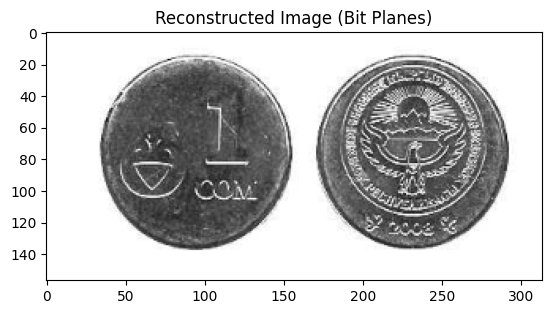

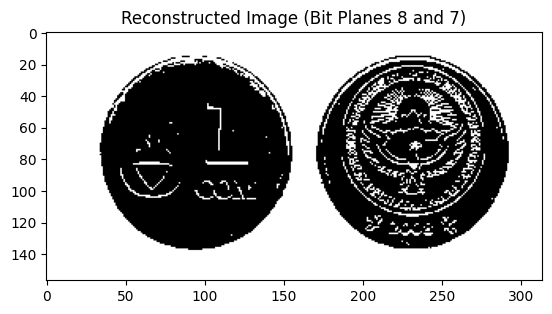

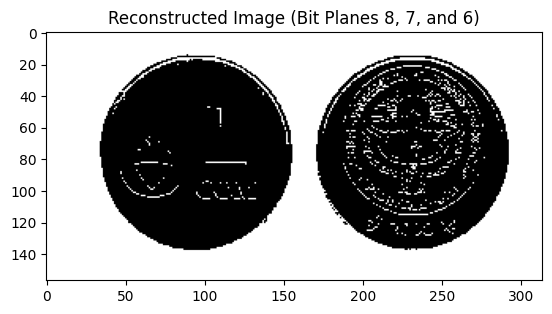

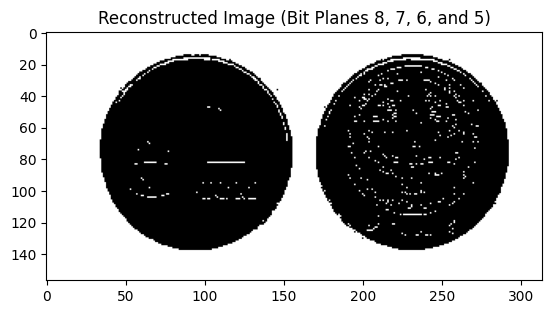

In [5]:
# Get the height and width of the image
height, width = img.shape

# Initialize images for each combination of bit planes
img_8_7 = np.zeros((height, width))
img_8_7_6 = np.zeros((height, width))
img_8_7_6_5 = np.zeros((height, width))

# Iterate over each pixel in the image
for i in range(height):
    for j in range(width):
        # Get the pixel value
        pixel = img[i, j]

        # Combine bits 8 and 7
        bit_8 = (pixel >> 7) & 1
        bit_7 = (pixel >> 6) & 1
        ket_hop_8_7 = (bit_8 << 1) | bit_7
        if ket_hop_8_7 == 3:  # 11
            img_8_7[i, j] = 255

        # Combine bits 8, 7, and 6
        bit_6 = (pixel >> 5) & 1
        ket_hop_8_7_6 = (bit_8 << 2) | (bit_7 << 1) | bit_6
        if ket_hop_8_7_6 == 7:  # 111
            img_8_7_6[i, j] = 255

        # Combine bits 8, 7, 6, and 5
        bit_5 = (pixel >> 4) & 1
        ket_hop_8_7_6_5 = (bit_8 << 3) | (bit_7 << 2) | (bit_6 << 1) | bit_5
        if ket_hop_8_7_6_5 == 15:  # 1111
            img_8_7_6_5[i, j] = 255

# Display the reconstructed images using matplotlib
plt.imshow(img, cmap='gray')
plt.title('Reconstructed Image (Bit Planes)')
plt.show()

plt.imshow(img_8_7, cmap='gray')
plt.title('Reconstructed Image (Bit Planes 8 and 7)')
plt.show()

plt.imshow(img_8_7_6, cmap='gray')
plt.title('Reconstructed Image (Bit Planes 8, 7, and 6)')
plt.show()

plt.imshow(img_8_7_6_5, cmap='gray')
plt.title('Reconstructed Image (Bit Planes 8, 7, 6, and 5)')
plt.show()